<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment</h1>

<div class="alert alert-success">
Hey! Thanks for the table of contens left. It makes the navigation so easy to do! Much appreciated for that! If possible, you can even extend this table, so I can jump to a particular part of the project directly if needed.
    
I like the way you use markdown cells to follow the reader throughout your project. Well done here and keep going this way. Remember that in the 3rd part of the project and write a report and having these comments already will ease your job later on.
    
    
It is great that you wrote some helper function to automate some repeatalbe operations. By the way, have you heard about docstrings in python? I urge you to use them in your custom functions. It will show your proficiency in Python and as a computer scietists.
    
    
`No empty values.` Keep in mind that some NaNs might be in a form of strings. Things like `no_info` or `tbc` are the same as missing values, so always check for them.
 
    
The models selection is absolutely great. I am pretty sure that some of them will lead us to decent performance!
    
    
`We will also check the Accuracy metric and F1 score to have a fuller understanding of the models.` I also want to highlight this part. Alghough I totally agree that it is great to have more than one metric for evaluation to understant the performance better, I do believe that accuracy might not be the best choice due to the unbalancy that you've found out!
   
    
Overall, great plan! Feel confident to move to the 2nd part!
</div>

# Supervised Machine Learning Research on Interconnect telecom operator

## Description of the Project

The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

## Description of the data

* The <b>contract</b> table:
    * `customerID` — unique user identifier
    * `BeginDate` 
    * `EndDate` 
    * `Type`  
    * `PaperlessBilling` 
    * `PaymentMethod` 
    * `MonthlyCharges` 
    * `TotalCharges` 
    
    
* The <b>personal</b> table:
    * `customerID` 
    * `gender` 
    * `SeniorCitizen`
    * `Partner` 
    * `Dependents`
    
    
* The <b>internet</b> table (data on texts):
    * `customerID` 
    * `InternetService`
    * `OnlineSecurity` 
    * `OnlineBackup`
    * `DeviceProtection`
    * `TechSupport`
    * `StreamingTV`
    * `StreamingMovies`
 
 
* The <b>phone</b> table (data on web sessions):
    * `customerID` 
    * `MultipleLines` 
 

## Description of the services
Interconnect mainly provides two types of services:

1. Landline communication. The telephone can be connected to several lines simultaneously.
2. Internet. The network can be set up via a telephone line (DSL, *digital subscriber line*) or through a fiber optic cable.

Some other services the company provides include:

- Internet security: antivirus software (*DeviceProtection*) and a malicious website blocker (*OnlineSecurity*)
- A dedicated technical support line (*TechSupport*)
- Cloud file storage and data backup (*OnlineBackup*)
- TV streaming (*StreamingTV*) and a movie directory (*StreamingMovies*)

The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.

## Overview of the general information 
<a class="anchor" id='section1'></a>

### Import Libraries

In [1]:
# ignore warnings
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [2]:
!pip install keras
!pip install --upgrade tensorflow
# !pip install --upgrade tensorflow-gpu

In [3]:
# !pip install plotly -Uq
# import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Timestamp
from functools import reduce
from scipy import stats as st
from IPython.display import display
import numpy as np
# try:
#     import plotly.express as px
# except:
#     !pip install plotly
#     import plotly.express as px
# try:
#     import sidetable
# except:
#     ! pip install sidetable -U
#     import sidetable
import re
# import plotly.graph_objs as go
import math as mth
try:
    from fast_ml.model_development import train_valid_test_split
except:
    !pip install fast_ml
    from fast_ml.model_development import train_valid_test_split
#pip install tensorflow

In [4]:
# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

# modelling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

from xgboost import XGBClassifier

%matplotlib inline

### Read files

In [5]:
try:
    df_contract = pd.read_csv('final_provider/contract.csv', index_col=['customerID'],
                          parse_dates=['BeginDate', 'EndDate'])
except:
    df_contract = pd.read_csv('/datasets/final_provider/contract.csv', index_col=['customerID'],
                          parse_dates=['BeginDate', 'EndDate'])

display(df_contract.sample(10))

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
2929-ERCFZ,2019-05-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,94.20,777.3
9135-MGVPY,2014-05-01,No,Two year,Yes,Mailed check,84.70,5878.9
0337-CNPZE,2016-06-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,106.30,4443.45
6584-VQMYT,2017-11-01,No,One year,No,Mailed check,56.20,1567.55
2040-LDIWQ,2014-09-01,No,Two year,Yes,Bank transfer (automatic),84.20,5324.5
1642-HMARX,2014-06-01,No,Two year,Yes,Electronic check,91.70,6424.7
5442-PPTJY,2019-02-01,No,Two year,No,Mailed check,19.70,258.35
7945-PRBVF,2017-03-01,No,Two year,No,Bank transfer (automatic),21.45,705.45
1934-SJVJK,2019-12-01,2020-01-01 00:00:00,Month-to-month,No,Mailed check,20.15,20.15


In [6]:
try:
    df_personal = pd.read_csv('final_provider/personal.csv', index_col=['customerID'])
except:
    df_personal = pd.read_csv('/datasets/final_provider/personal.csv', index_col=['customerID'])

display(df_personal.sample(10))

,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
0748-RDGGM,Male,0,Yes,No
0089-IIQKO,Female,0,Yes,Yes
1852-XEMDW,Male,0,No,No
8347-GDTMP,Female,0,Yes,No
6619-RPLQZ,Female,0,Yes,Yes
0096-FCPUF,Male,0,No,No
6918-UMQCG,Female,0,No,No
8873-GLDMH,Female,0,No,No
8755-OGKNA,Female,0,Yes,Yes


In [7]:
try:
    df_internet = pd.read_csv('final_provider/internet.csv', index_col=['customerID'])
except:
    df_internet = pd.read_csv('/datasets/final_provider/internet.csv', index_col=['customerID'])

display(df_internet.sample(10))

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
9821-BESNZ,Fiber optic,No,Yes,No,Yes,Yes,Yes
1867-BDVFH,Fiber optic,No,No,No,No,No,No
2192-OZITF,DSL,Yes,No,No,Yes,No,Yes
7929-DMBCV,Fiber optic,No,No,Yes,Yes,No,No
9659-ZTWSM,Fiber optic,No,Yes,Yes,Yes,Yes,Yes
2979-SXESE,Fiber optic,Yes,No,Yes,No,Yes,No
2665-NPTGL,Fiber optic,No,No,Yes,No,Yes,Yes
5593-SUAOO,Fiber optic,No,Yes,Yes,No,No,No
7075-BNDVQ,DSL,Yes,No,Yes,No,No,No


In [8]:
try:
    df_phone = pd.read_csv('final_provider/phone.csv', index_col=['customerID'])
except:
    df_phone = pd.read_csv('/datasets/final_provider/phone.csv', index_col=['customerID'])

display(df_phone.sample(10))

,MultipleLines
customerID,
2834-JRTUA,Yes
1891-UAWWU,Yes
0704-VCUMB,No
6583-SZVGP,Yes
8267-ZNYVZ,No
5268-DSMNQ,Yes
4607-CHPCA,No
2484-DGXPZ,No
5201-USSQZ,No


#### Observations:

* Customer ID is the unique identifier (PK) of all the tables hence I made him the index. It will also make it easier later to join the tables together.
* The target - `EndDate` has mixed values of dates and the string `No`- We would have to create a new binary field that will be the target.
* Many fields are object type so we will need to transform them to binary or encode them.


##  Exploring the data

In [9]:
def explore(header, df):
    """Prints info, description and percent of missing values for the given table.

    Keyword arguments:
    header -- the table name
    df -- the data frame
    """
    print(F'*****{header} info*****:')
    print('')
    df.info();
    print()   
    print('\nGeneral description:')
    display(df.describe())
    print('\nLooking for empty values:')
    try:
        print(df.stb.missing(style=True))
    except:
        print(df.isna().sum())
    print('')

In [10]:
tables_dict = {
    'contract':df_contract,
    'internet':df_internet,
    'personal':df_personal,
    'phone':df_phone
}
    
for k,v in tables_dict.items():
    explore(k,v)

*****contract info*****:

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   object        
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 440.2+ KB


General description:


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000



Looking for empty values:
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

*****internet info*****:

<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   5517 non-null   object
 1   OnlineSecurity    5517 non-null   object
 2   OnlineBackup      5517 non-null   object
 3   DeviceProtection  5517 non-null   object
 4   TechSupport       5517 non-null   object
 5   StreamingTV       5517 non-null   object
 6   StreamingMovies   5517 non-null   object
dtypes: object(7)
memory usage: 344.8+ KB


General description:


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517
unique,2,2,2,2,2,2,2
top,Fiber optic,No,No,No,No,No,No
freq,3096,3498,3088,3095,3473,2810,2785



Looking for empty values:
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

*****personal info*****:

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
dtypes: int64(1), object(3)
memory usage: 275.1+ KB


General description:


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000



Looking for empty values:
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

*****phone info*****:

<class 'pandas.core.frame.DataFrame'>
Index: 6361 entries, 5575-GNVDE to 3186-AJIEK
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MultipleLines  6361 non-null   object
dtypes: object(1)
memory usage: 99.4+ KB


General description:


,MultipleLines
count,6361
unique,2
top,No
freq,3390



Looking for empty values:
MultipleLines    0
dtype: int64



#### Observations:
* contract:
    - 7043 entries.
    - Type, PaperlessBilling, PaymentMethod should be encoded (maybe OHE)
    - TotalCharges should be numerical
* internet:
    - 5517 entries.
    - all columns are objectr and have 2 unique values each, so they should be encoded to numerical (0 and 1)
* personal:
    - 7043 entries.
    - all columns except for SeniorCitizen should be encoded to numerical
* phone:
    - 6361 entries
    - only one column MultipleLines which is numerical with 2 unique values. will be binary( 1 and 0)
* Since the customer ID is the index it's unique so no duplicated rows.
* No empty values.
* personal and contract DFs both have 7043 customers and set the size of our population. Phone and internet has a lower amount since not all customers have those services. We will need to add 2 more columns to indicate who has these services before joining the tables together.

## Preprocessing 

### Creating a new target column `loyal`

In [11]:
df_contract['loyal'] = (df_contract['EndDate'] == 'No').astype(int)

In [12]:
df_contract

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,loyal
customerID,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,1
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,1
3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,0
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,1
9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,0
...,...,...,...,...,...,...,...,...
6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,1
2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,1
4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,1


### Adding features to indicate phone and internet services

In [13]:
df_phone['has_phone'] = 1
df_internet['has_internet'] = 1

### Joining all 4 tables to 1 DF 
filling empty values with 0 to indicate the lack of a service.

In [14]:
df = df_contract.join([df_phone, df_internet,df_personal])
df = df.fillna(0)
df.sample(20)

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,loyal,MultipleLines,has_phone,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,has_internet,gender,SeniorCitizen,Partner,Dependents
customerID,,,,,,,,,,,,,,,,,,,,,
6158-HDPXZ,2020-01-01,No,Month-to-month,No,Mailed check,25.35,25.35,1,0,0.0,...,No,No,No,No,No,1.0,Male,0,No,No
0988-AADSA,2014-02-01,No,Two year,No,Bank transfer (automatic),80.85,5824.75,1,Yes,1.0,...,Yes,Yes,Yes,No,Yes,1.0,Female,0,Yes,Yes
2378-VTKDH,2014-09-01,No,Month-to-month,Yes,Electronic check,104.35,6578.55,1,Yes,1.0,...,Yes,Yes,No,Yes,Yes,1.0,Male,1,Yes,No
0201-OAMXR,2014-01-01,2019-11-01 00:00:00,One year,No,Credit card (automatic),115.55,8127.6,0,Yes,1.0,...,Yes,Yes,Yes,Yes,Yes,1.0,Female,0,No,No
4302-ZYFEL,2014-05-01,No,One year,Yes,Credit card (automatic),20.55,1403.1,1,No,1.0,...,0,0,0,0,0,0.0,Male,0,Yes,Yes
6393-WRYZE,2017-01-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,97.65,3207.55,0,Yes,1.0,...,No,No,No,Yes,Yes,1.0,Female,0,Yes,No
6532-YLWSI,2015-06-01,2019-11-01 00:00:00,One year,No,Bank transfer (automatic),20.80,1021.8,0,No,1.0,...,0,0,0,0,0,0.0,Female,0,Yes,No
9732-KPKBW,2019-12-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,53.95,53.95,0,No,1.0,...,No,No,Yes,No,No,1.0,Male,0,No,No
1703-MGIAB,2018-09-01,No,Month-to-month,Yes,Mailed check,69.00,1108,1,Yes,1.0,...,No,Yes,Yes,Yes,No,1.0,Female,0,No,No


### Looking for weird values

In [15]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

#### Observation:
Found an empty string in `TotalCharges` so will put the median value instead (we want to avoid the effect of outliers so we will not use the mean).

### Remove empty strings

In [16]:
df.loc[df['TotalCharges']==' ','TotalCharges'] = np.nan
df = df.dropna()

In [17]:
df.isnull().sum()

BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
loyal               0
MultipleLines       0
has_phone           0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
has_internet        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
dtype: int64

### Changing data types

In [18]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [19]:
try:
    print(df.stb.missing(style=True))
except:
    print(df.isna().sum())

BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
loyal               0
MultipleLines       0
has_phone           0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
has_internet        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
dtype: int64


In [20]:
for col in ('Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'MultipleLines', 'PaperlessBilling'):
    df[col]= (df[col]=='No').astype(int)

### Creating `Lifetime` feature

In [21]:
df['EndDate'] = df['EndDate'].apply(lambda x: '2020-02-01' if x=='No' else x)
df['Lifetime'] = ((pd.to_datetime(df['EndDate'])-df['BeginDate'] ) / np.timedelta64(1,'D')).astype('int32')


In [22]:
df

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,loyal,MultipleLines,has_phone,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,has_internet,gender,SeniorCitizen,Partner,Dependents,Lifetime
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,0,Electronic check,29.85,29.85,1,0,0.0,...,1,1,1,1,1.0,Female,0,0,1,31
5575-GNVDE,2017-04-01,2020-02-01,One year,1,Mailed check,56.95,1889.50,1,1,1.0,...,0,1,1,1,1.0,Male,0,1,1,1036
3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,0,Mailed check,53.85,108.15,0,1,1.0,...,1,1,1,1,1.0,Male,0,1,1,61
7795-CFOCW,2016-05-01,2020-02-01,One year,1,Bank transfer (automatic),42.30,1840.75,1,0,0.0,...,0,0,1,1,1.0,Male,0,1,1,1371
9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,0,Electronic check,70.70,151.65,0,1,1.0,...,1,1,1,1,1.0,Female,0,1,1,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,2018-02-01,2020-02-01,One year,0,Mailed check,84.80,1990.50,1,0,1.0,...,0,0,0,0,1.0,Male,0,0,0,730
2234-XADUH,2014-02-01,2020-02-01,One year,0,Credit card (automatic),103.20,7362.90,1,0,1.0,...,0,1,0,0,1.0,Female,0,0,0,2191
4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,0,Electronic check,29.60,346.45,1,0,0.0,...,1,1,1,1,1.0,Female,0,0,0,337


In [23]:
# sns.pairplot(df)
# plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7032 non-null   datetime64[ns]
 1   EndDate           7032 non-null   object        
 2   Type              7032 non-null   object        
 3   PaperlessBilling  7032 non-null   int32         
 4   PaymentMethod     7032 non-null   object        
 5   MonthlyCharges    7032 non-null   float64       
 6   TotalCharges      7032 non-null   float64       
 7   loyal             7032 non-null   int32         
 8   MultipleLines     7032 non-null   int32         
 9   has_phone         7032 non-null   float64       
 10  InternetService   7032 non-null   object        
 11  OnlineSecurity    7032 non-null   int32         
 12  OnlineBackup      7032 non-null   int32         
 13  DeviceProtection  7032 non-null   int32         
 14  TechSupport   

### Encoding - OHE

In [25]:
# We will do OHE before Train/Test/Validation split for simplicity

ohe_encoding = ['Type','PaymentMethod','InternetService','gender']
df_ohe = pd.get_dummies(df[ohe_encoding], drop_first=True)
df_ohe.head(5)

,Type_One year,Type_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,gender_Male
customerID,,,,,,,,
7590-VHVEG,0,0,0,1,0,1,0,0
5575-GNVDE,1,0,0,0,1,1,0,1
3668-QPYBK,0,0,0,0,1,1,0,1
7795-CFOCW,1,0,0,0,0,1,0,1
9237-HQITU,0,0,0,1,0,0,1,0


In [26]:
# We join back the OHE columns and drop the original ones
df = df.join(df_ohe).drop(ohe_encoding, axis=1)

In [27]:
df = df.drop(['EndDate','BeginDate'],axis=1)

### Features and Target distribution
Let's look at the distributions for each numeric variable in the dataset including the target `Loyal`:

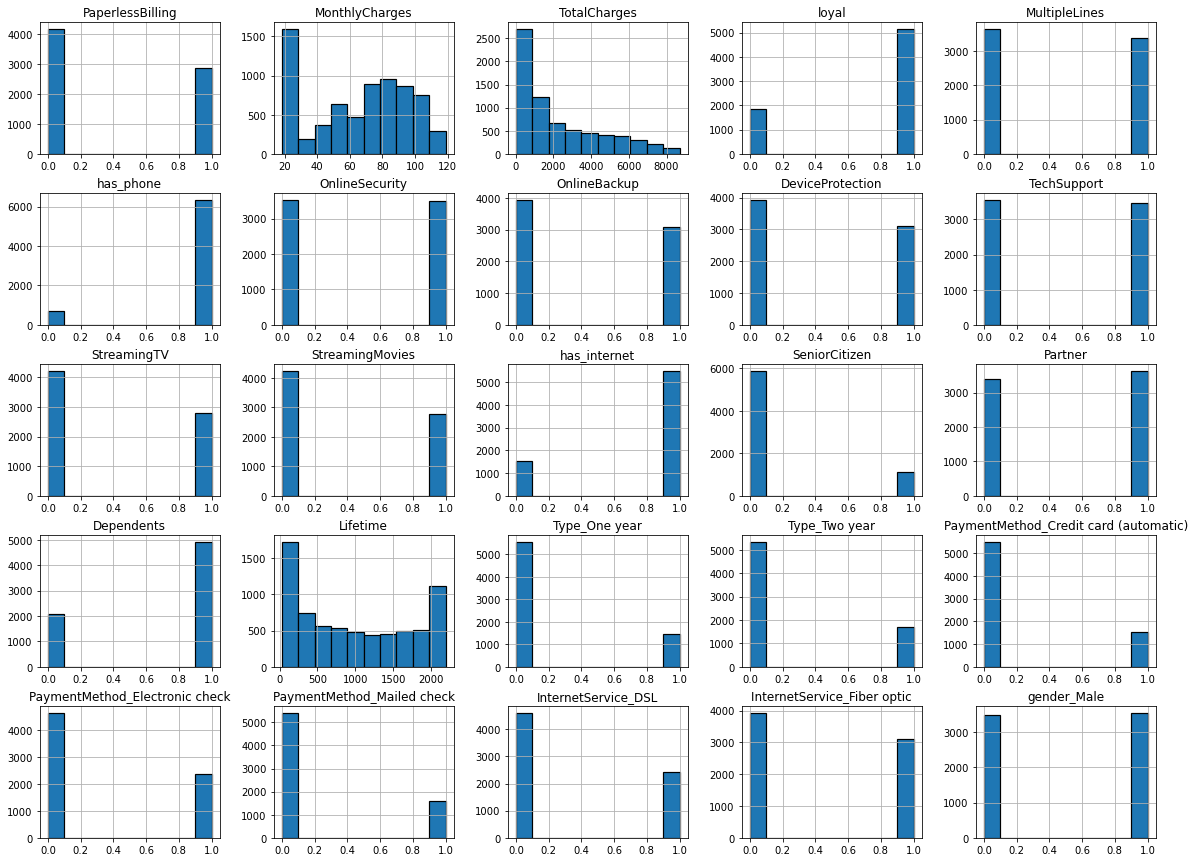

In [28]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(20,15));

#### Observations:
* We examined the balance of the classes for the target column `Loyal` and found out it is unbalanced. Only ~25% of the data is positive (1 or did not churn). We should either choose models that are not sensitive to this or use upsampling/downsampling and class_weight='balanced'.
* Many clients have a very low monthly charges and the rest distribute normally. It will be interesting to check who are those customers and whether they left or stayed.

### Features and Target correlation
**Let's check how our features correlate with each other:**

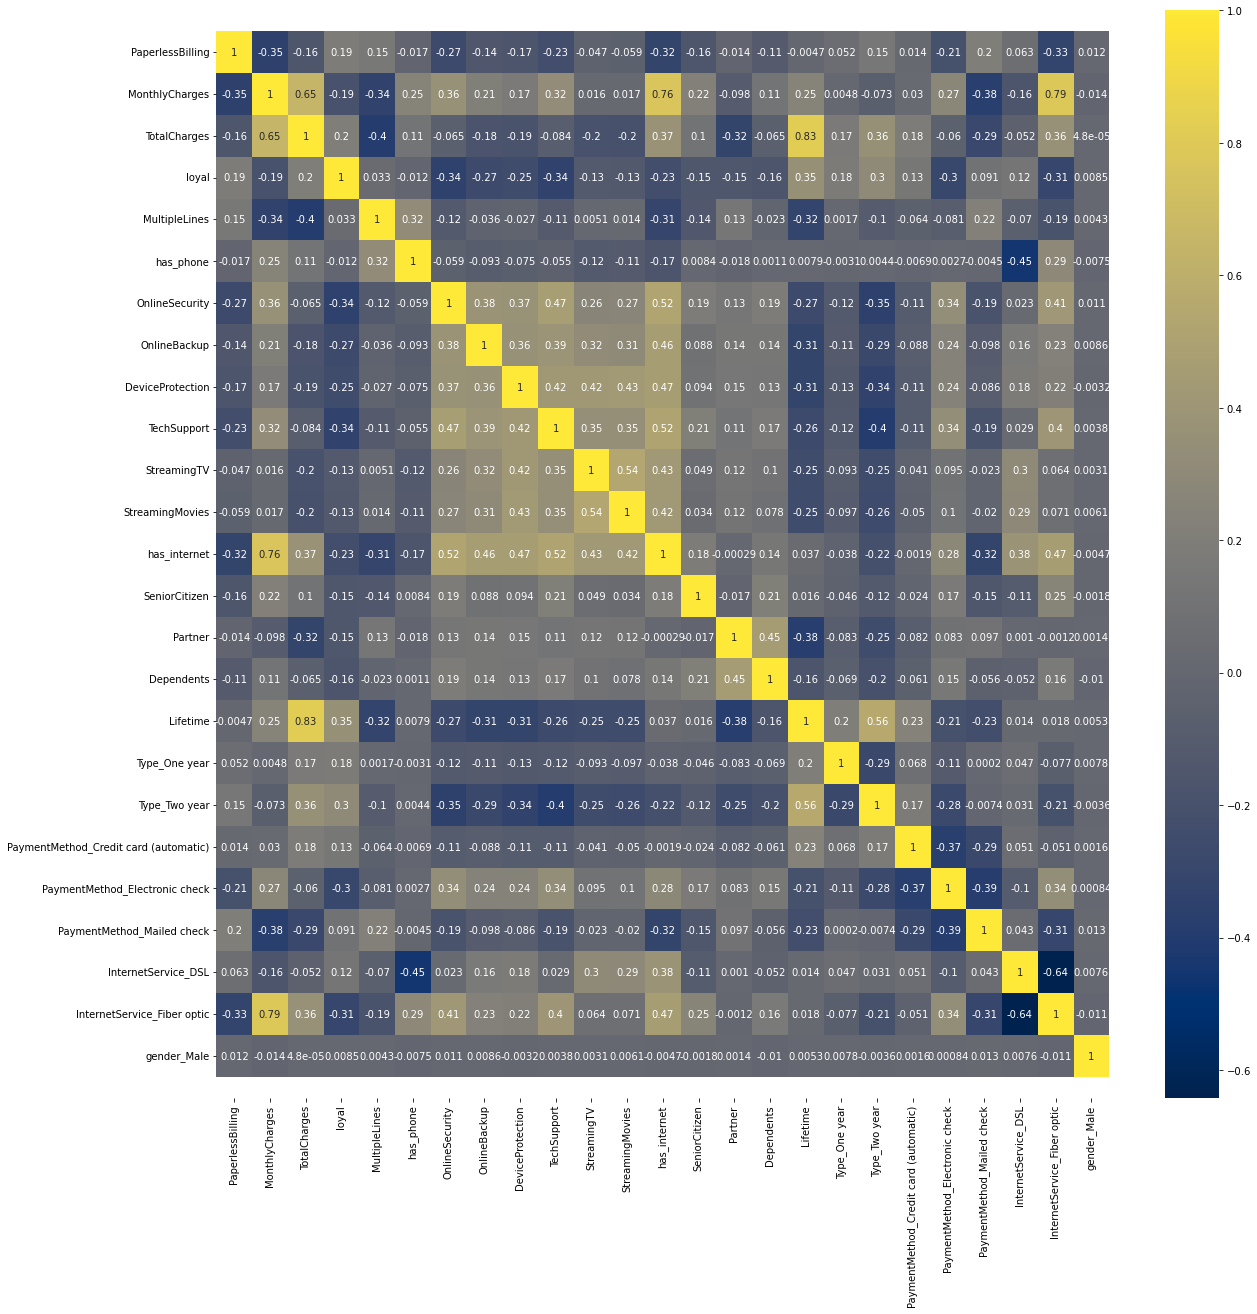

In [29]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(df.corr(), annot=True, cmap='cividis')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
plt.yticks(rotation=0);

#### Observations:
* It seems that most of the variables have week correlations between them. It means that they're not redundant and we cannot remove anyone of them. The only features that have a high correlation (but not too high) are `has_internet` and `InternetService_Fiber optic`  that have hogh correlation with `TotalCharges`. It means that the internet service and especially the fiber optic service contribute enormausely to the price. It will be inteesting to check the effect on the churn. 

* All the features have a week correlation to the `loyal` target. (At least there is no data leakage here :) )

In [30]:
# Cohort analysis... didn't work out

In [31]:
# df.loc[df['EndDate']=='No', 'EndDate'] = pd.to_datetime('2020-02-01 00:00:00')

In [32]:
# df_retention = df.copy()
# df_retention = df_retention.query('BeginDate>="2019-01-01 00:00:00"')
# df_retention['cohort'] = df_retention['BeginDate'].astype('datetime64[M]')
# df_retention['age'] = ((pd.to_datetime(df_retention['EndDate']) - pd.to_datetime(df_retention['BeginDate'])) / np.timedelta64(1,'M')).round().astype('int')
# display(df_retention.head())

Lets see how many users were active from certain cohorts on a certain time after registration:

In [33]:
# df_retention['uid'] = df_retention.index

In [34]:
# cohorts = df_retention.pivot_table(index='cohort',
#                   columns='age',
#                   values='uid',
#                   aggfunc='nunique').fillna(0)
# cohorts

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PaperlessBilling                       7032 non-null   int32  
 1   MonthlyCharges                         7032 non-null   float64
 2   TotalCharges                           7032 non-null   float64
 3   loyal                                  7032 non-null   int32  
 4   MultipleLines                          7032 non-null   int32  
 5   has_phone                              7032 non-null   float64
 6   OnlineSecurity                         7032 non-null   int32  
 7   OnlineBackup                           7032 non-null   int32  
 8   DeviceProtection                       7032 non-null   int32  
 9   TechSupport                            7032 non-null   int32  
 10  StreamingTV                            7032 non-null   int32  

In [36]:
df['MonthlyCharges'] = df['MonthlyCharges'].astype(int)
df['TotalCharges'] = df['TotalCharges'].astype(int)

In [37]:
df

,PaperlessBilling,MonthlyCharges,TotalCharges,loyal,MultipleLines,has_phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Dependents,Lifetime,Type_One year,Type_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,gender_Male
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,29,29,1,0,0.0,1,0,1,1,...,1,31,0,0,0,1,0,1,0,0
5575-GNVDE,1,56,1889,1,1,1.0,0,1,0,1,...,1,1036,1,0,0,0,1,1,0,1
3668-QPYBK,0,53,108,0,1,1.0,0,0,1,1,...,1,61,0,0,0,0,1,1,0,1
7795-CFOCW,1,42,1840,1,0,0.0,0,1,0,0,...,1,1371,1,0,0,0,0,1,0,1
9237-HQITU,0,70,151,0,1,1.0,1,1,1,1,...,1,61,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,84,1990,1,0,1.0,0,1,0,0,...,0,730,1,0,0,0,1,1,0,1
2234-XADUH,0,103,7362,1,0,1.0,1,0,0,1,...,0,2191,1,0,1,0,0,0,1,0
4801-JZAZL,0,29,346,1,0,0.0,0,1,1,1,...,0,337,0,0,0,1,0,1,0,0


### Locating outliers

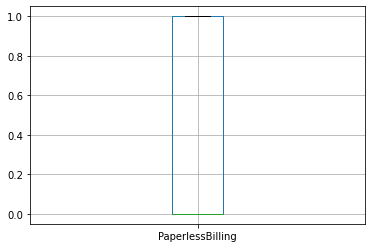

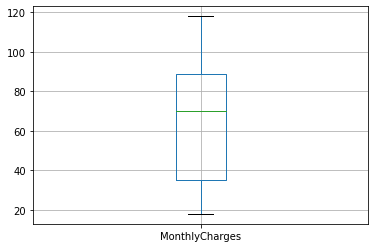

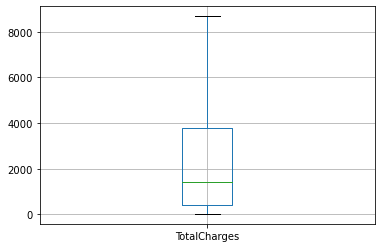

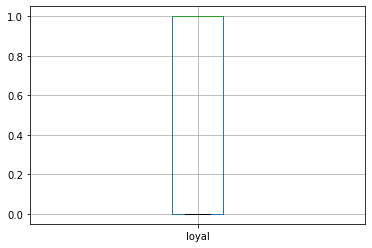

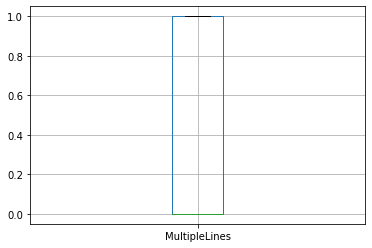

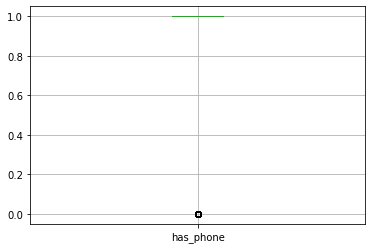

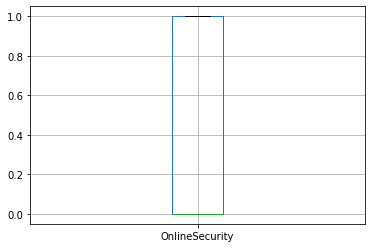

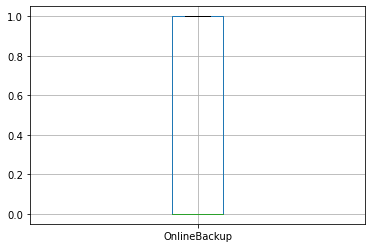

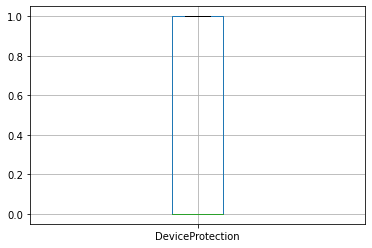

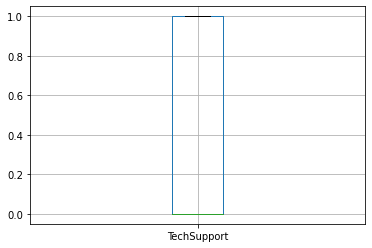

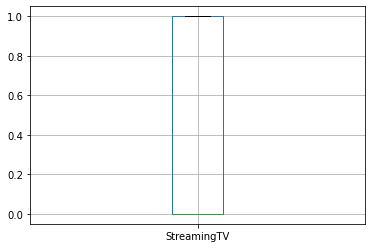

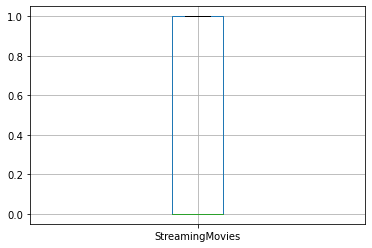

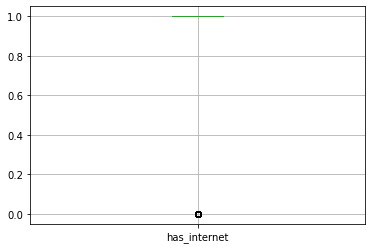

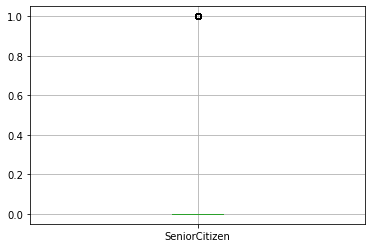

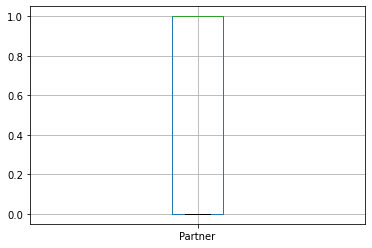

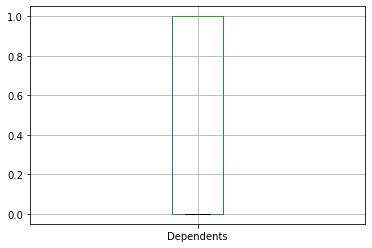

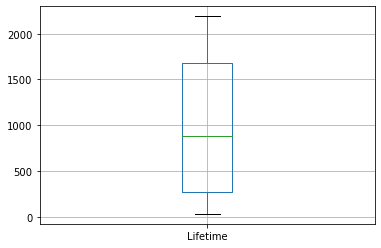

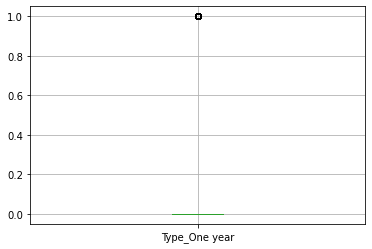

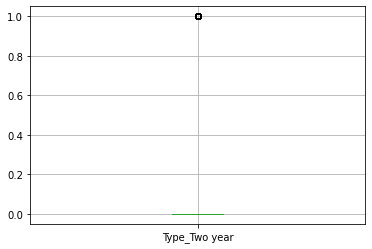

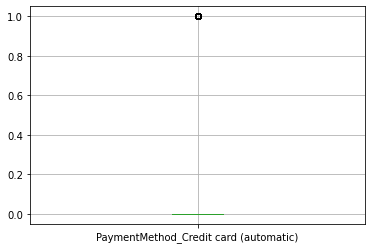

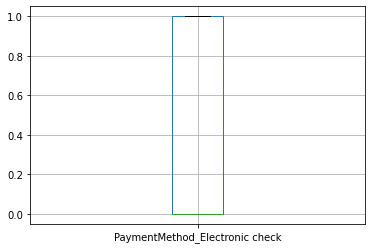

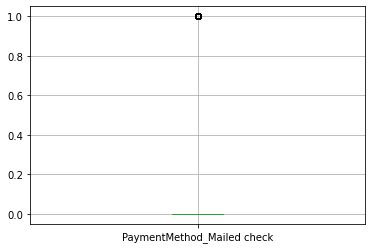

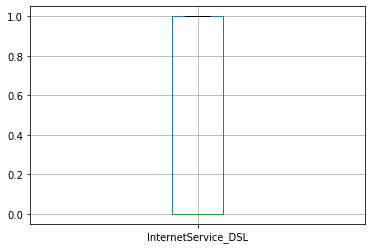

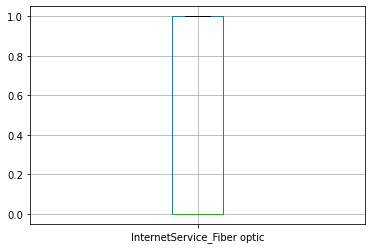

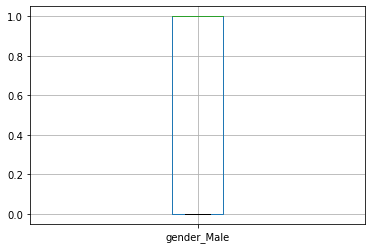

In [38]:
for column in df:
    plt.figure()
    df.boxplot([column])

#### Observations:
There aren't any significant outliers so we will leave it as is.

### Features correlation with the target

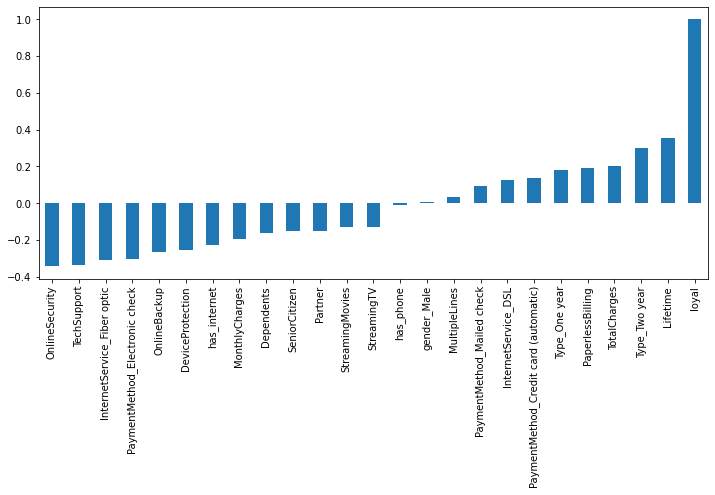

In [39]:
df.corr()['loyal'].sort_values().plot(kind='bar', figsize=(12,5));

#### Observations:
The strongest correlation to the target is 0.35 which is not so high. It means that we will need more features in order to predict the target well enough. 
`Lifetime` and `Type_Two year` have the strongest positive correlation. It make sense because the longer period the customer exists the more satisfied he is and less willing to churn. And I guess that customers that pay by a dual year basis are there for longer and not planning to leave the company.

On the other side `onlineSecurity` and `TechSupport` have the strongest negative correlation to the target. I guess people that have these services are not satisfied and would more probably leave the company. It's worth to check the quality of those services any maybe improve them.

`has_phone` and `gender` have the lowest correlation - almost 0. It probably doesn't affect the possibility to churn.

In [40]:
# split the data set to 3 sets: training, validation and test. Each set is seperated to features and target-is_ultra.
# features_train, target_train, features_valid, target_valid, features_test, target_test = train_valid_test_split(
#     df, target = 'loyal', train_size=0.6, valid_size=0.2, test_size=0.2, random_state=12345)


### Split the data to train and test sets
Since we're working with cross validation it's enough to split to train set and test set (without validation set). The gridsearchCV will split the train set to different subsets of train and validation in each set.

In [41]:
# split the data set to 2 sets: training and test. Each set is seperated to features and target-loyal.
features = df.drop('loyal',axis=1)
target = df['loyal']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=12345)


In [42]:
print('features_train:',features_train.shape), print('target_train: ',target_train.shape)
# print('features_valid: ',features_valid.shape), print('target_valid: ',target_valid.shape)
print('features_test: ',features_test.shape), print('target_test: ',target_test.shape)

features_train: (5625, 24)
target_train:  (5625,)
features_test:  (1407, 24)
target_test:  (1407,)


(None, None)

### Feature engineering - KMeans clustering
In order to get additional information from our given features let's try and create a new feature using unsupervised learning model for clustering - The KMeans model. The model will try and create segmentation of the bank's customers that will be called `label`. Later on we will use this feature in addition to the other features and see the effect on the model's scores. But first let's find out what is the most suitable amount of clusters we need.

#### Selecting amount of clusters

In [43]:
df_clusters = df.drop('loyal',axis=1)
distortion = []
K = range(1, 8)
for k in K:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(df_clusters)
    distortion.append(model.inertia_)

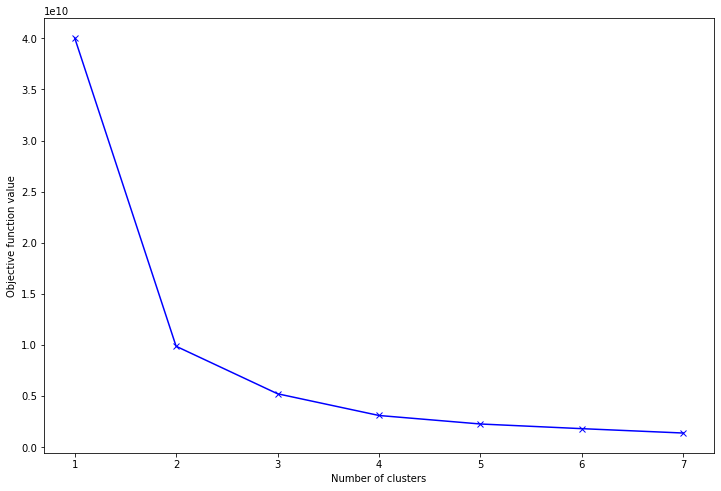

In [44]:
plt.figure(figsize=(12, 8))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Objective function value')
plt.show()

The sum of errors gets lower as th number of classes rises. We can see the elbow breaks between 2-5 clusters. Let's try 2 clusters and 4 clusters and see the influence on the models performances.

In [45]:
df.columns

Index(['PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'loyal',
       'MultipleLines', 'has_phone', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'has_internet', 'SeniorCitizen', 'Partner', 'Dependents', 'Lifetime',
       'Type_One year', 'Type_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_DSL', 'InternetService_Fiber optic', 'gender_Male'],
      dtype='object')

In [46]:
# # Training a model for 4 clusters
# df_clusters = df_clusters[['PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
#        'MultipleLines','has_internet', 'SeniorCitizen', 'Lifetime',
#        'Type_One year', 'Type_Two year',
#        'PaymentMethod_Credit card (automatic)',
#        'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
#        'InternetService_DSL', 'InternetService_Fiber optic']]

# model = KMeans(n_clusters=4, random_state=12345)
# model.fit(df_clusters)
# centroids = pd.DataFrame(model.cluster_centers_, columns=df_clusters.columns)
# df_clusters['label'] = model.labels_.astype(str)
# centroids['label'] = ['0 centroid', '1 centroid', '2 centroid', '3 centroid']
# data_all = pd.concat([df_clusters, centroids], ignore_index=True)

# # Plot the graph
# sns.pairplot(data_all, hue='label', diag_kind='hist')


#### Creating 2 clusters variable

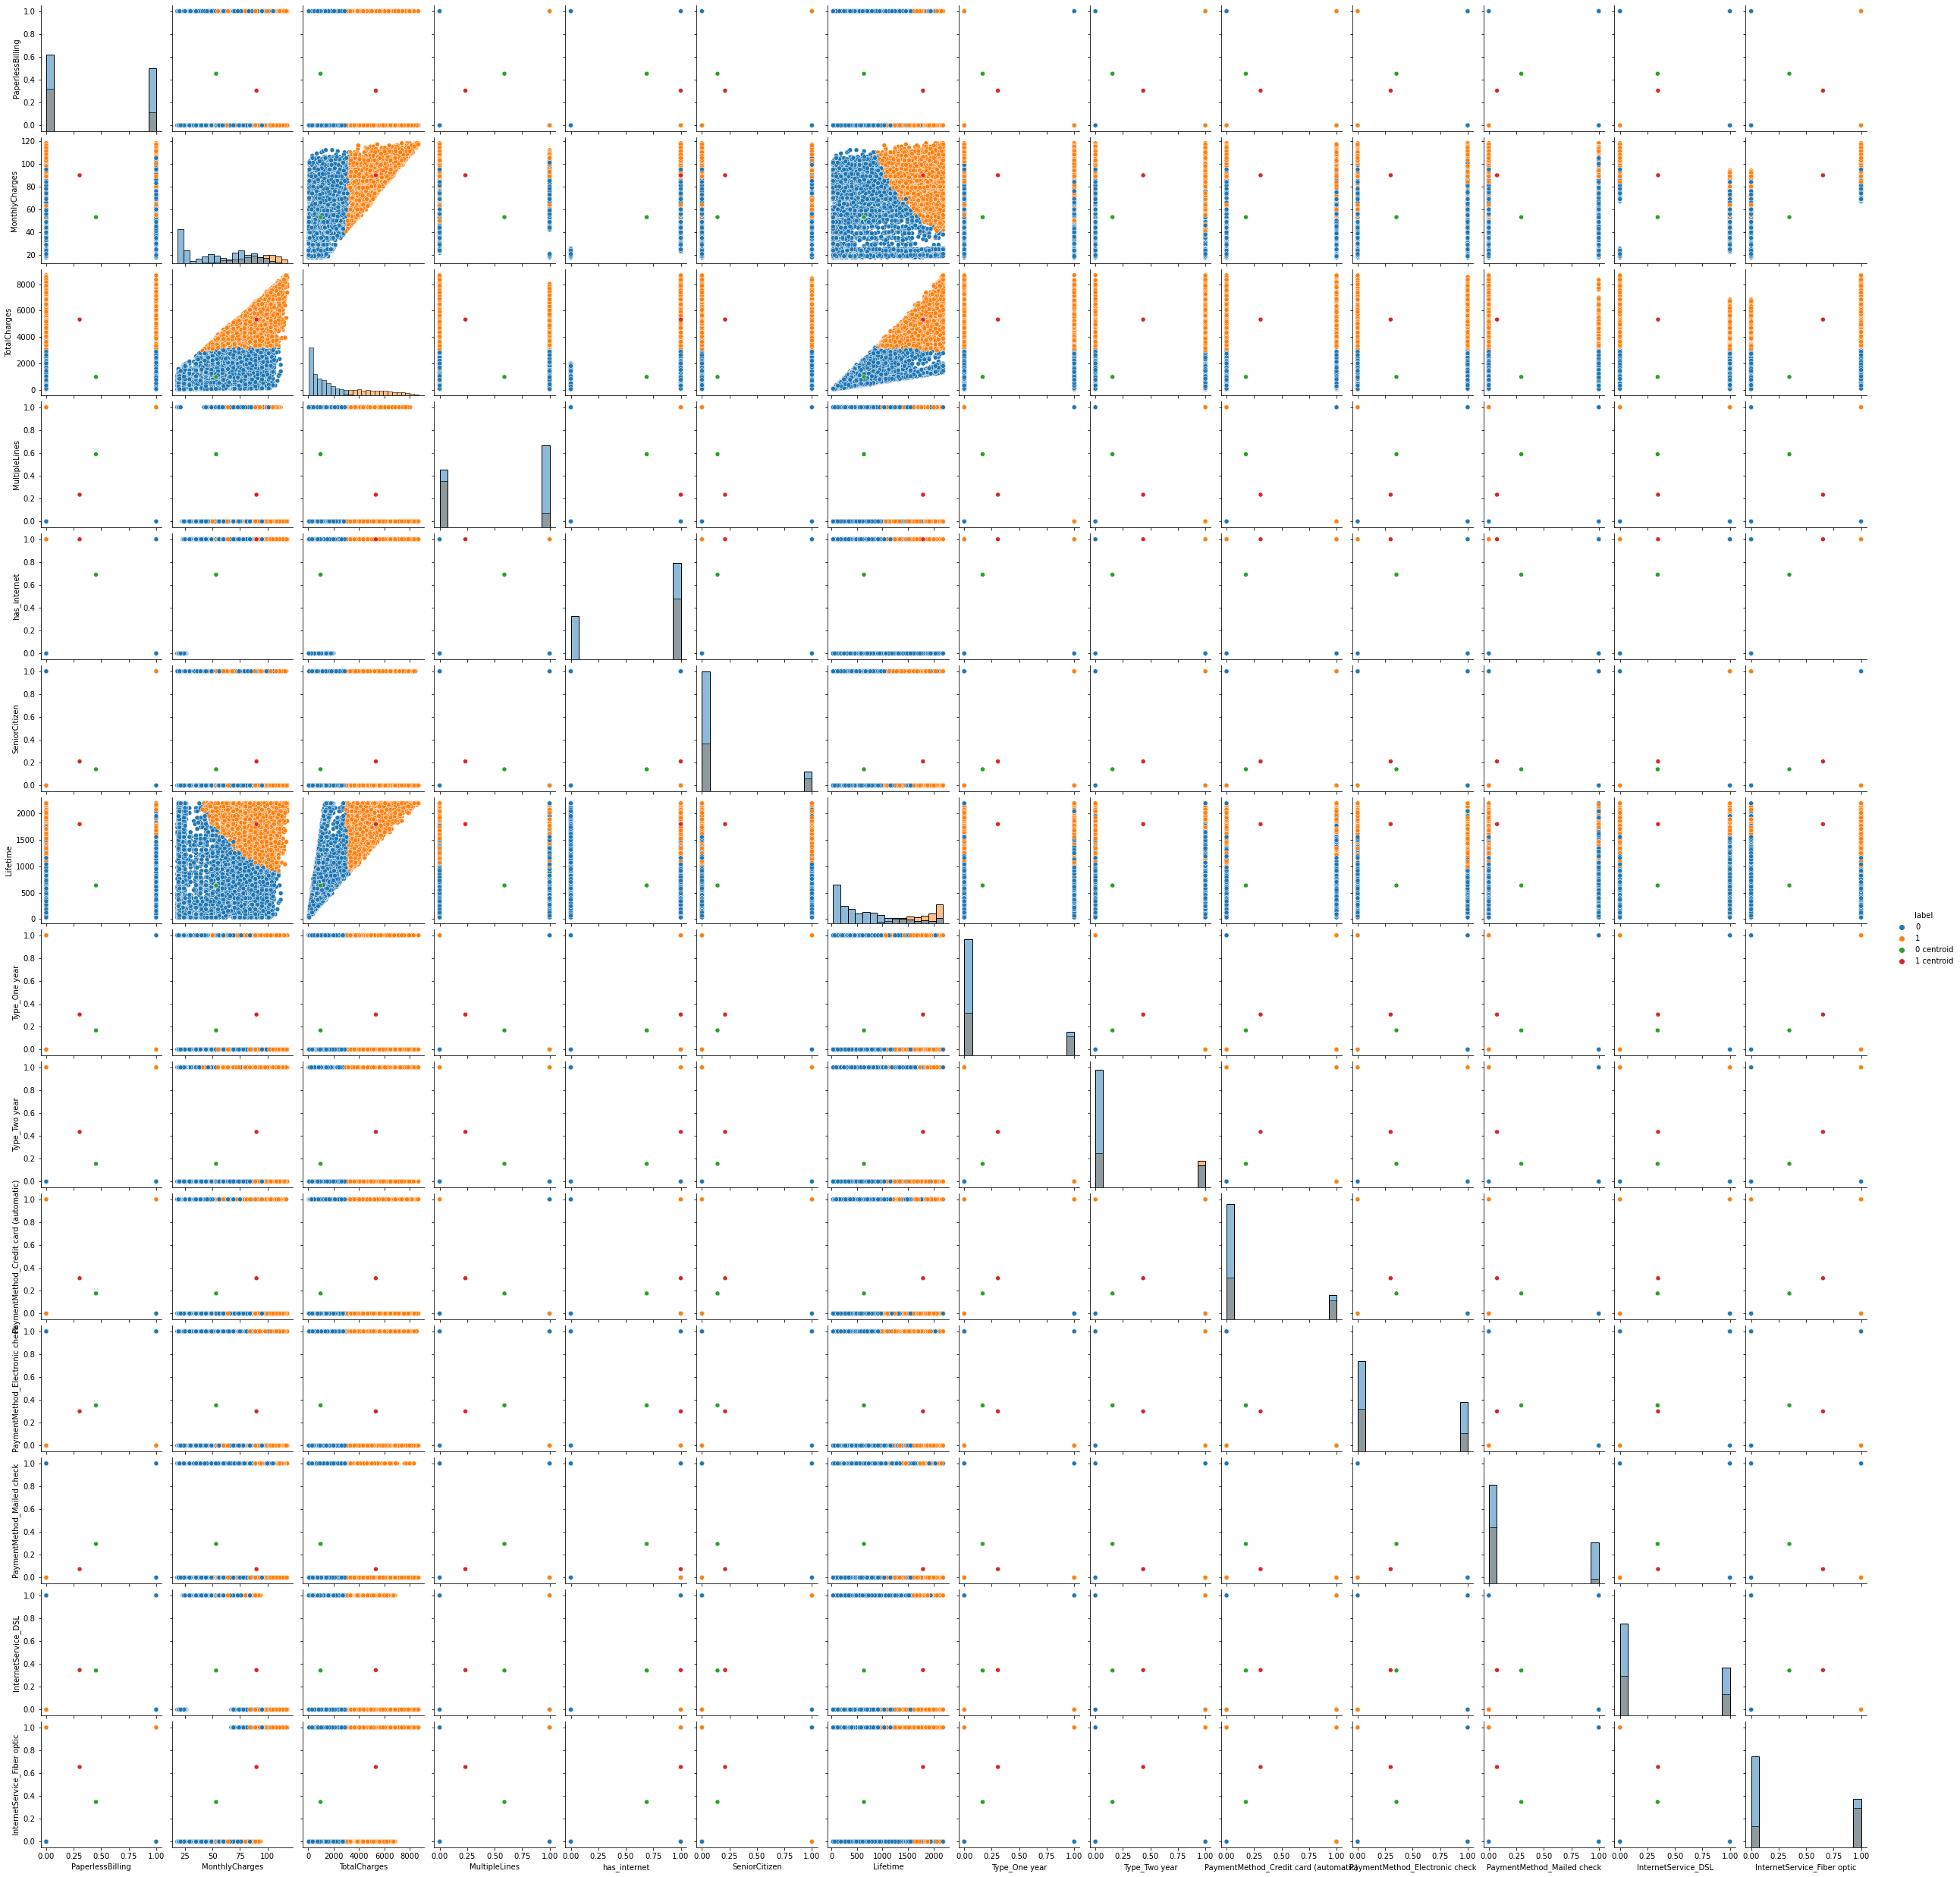

In [47]:
# Training a model for 2 clusters
df_clusters = df_clusters[['PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines','has_internet', 'SeniorCitizen', 'Lifetime',
       'Type_One year', 'Type_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_DSL', 'InternetService_Fiber optic']]

model = KMeans(n_clusters=2, random_state=12345)
model.fit(df_clusters)
centroids = pd.DataFrame(model.cluster_centers_, columns=df_clusters.columns)
df_clusters['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroid', '1 centroid']
data_all = pd.concat([df_clusters, centroids], ignore_index=True)

# Plot the graph
sns.pairplot(data_all, hue='label', diag_kind='hist')


#### Observations:
We tried both 2 clusters and 4 clusters and in both cases we can see that the pairplot looks bizarre. There aren't any clear patterns of clusters apparently since most of our features are binary. It maybe a good idea to try more advanced models like DBScan ( in other project :) ).

### Evaluate model helper functions

In [48]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    '''
     Calculate and prints the following metrics for train set and test set:
     Accuracy, F1 , APS and ROC AUC
     Prints 3 graphs:
     F1 Score, ROC curve and PRC 
    '''
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

In [49]:

def model_eval(model_name, param_grid, model_headline, features_train, target_train, features_test, target_test):
    '''
    Creates a pipeline with standard scaling and the given model.
    Runs a grid search with cross validation on the train set with the given hyperparameters.
    Prints the best esrimator models and hyperparameters.
    Predicts on the test set. (use predict proba on possibe models).
    Prints the model's confusion matrix.
    Returns a DF row of the model headline, evaluation metrics and best estimator.
    '''
    # creating a pipeline
    pipeline = Pipeline([('scale', StandardScaler()), ('model', model_name)])
    # gridsearchcv model
    model = GridSearchCV(pipeline, param_grid=param_grid , cv=5, scoring= 'roc_auc')
    model.fit(features_train, target_train)
    print(model.best_estimator_)
#     print(model.best_score_.round(3))
    if hasattr(model.best_estimator_._final_estimator, 'predict_proba'):
        test_predict_p = model.predict_proba(features_test)[:,1] 
        roc_auc = roc_auc_score(target_test, test_predict_p)
    else:
        test_predict = model.predict(features_test)
        roc_auc = roc_auc_score(target_test, test_predict)
    test_predict = model.predict(features_test)
    
    try:
        # get importance
        importance = model.best_estimator_._final_estimator.feature_importances_
        # summarize feature importance
        feature_importances=pd.DataFrame({'features':features_test.columns,'importance':importance})
        print("Top 12 important features")
#         print("Features importance")
        display(feature_importances.sort_values('importance',ascending=False),head[12])
    except:
        try:
            feature_importances=pd.DataFrame({'feature':list(features_test.columns),'importance':[abs(i) for i in grid.best_estimator_._final_estimator.coef_[0]]})
            # summarize feature importance
            print("Top 12 important features")
            display(feature_importances.sort_values('importance',ascending=False).head[12])
        except:
            print('There is no feature_importances_ attribute for this model')
            
    cm = confusion_matrix(target_test, test_predict)
    # visualize confusion matrix with seaborn heatmap

    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
#     print(test_predict)
    f1 = f1_score(target_test, test_predict)
    acc = accuracy_score(target_test, test_predict)
    evaluate_model(model, features_train, target_train, features_test, target_test)


    return(pd.DataFrame([[ model.best_score_.round(3),  
                          acc , f1, roc_auc, model.best_estimator_]], 
                        columns=['Train AUC ROC',
                                 'Test Accuracy', 'Test F1','Test AUC ROC','Model Params'],
                       index=[model_headline]))

## Testing the models

### Decision Tree - Baseline model

Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_leaf=10,
                                        min_samples_split=90,
                                        random_state=12345))])
Top 12 important features
There is no feature_importances_ attribute for this model
          train  test
Accuracy   0.79  0.77
F1         0.84  0.83
APS        0.96  0.93
ROC AUC    0.89  0.85
Wall time: 3.72 s


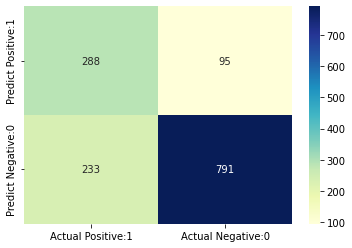

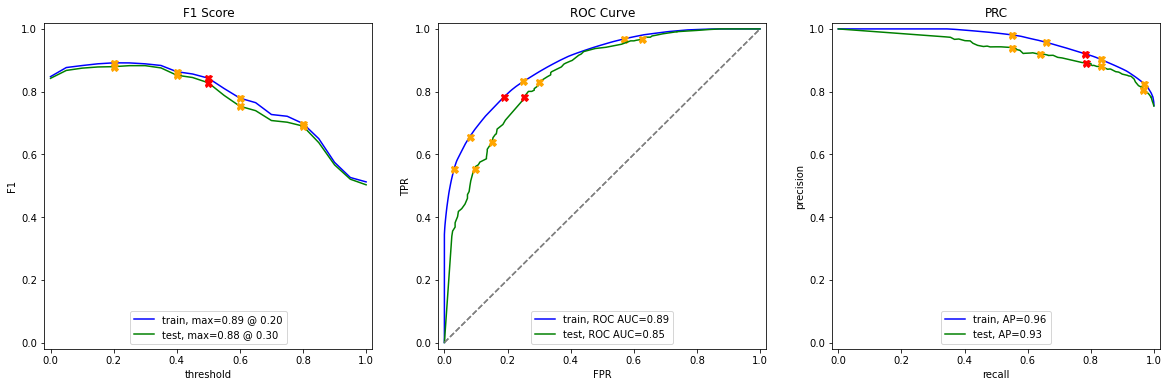

In [50]:
%%time
# train predict model with the matrics of f1 which is better for imbalanced classes and evaluate it with roc_auc
params  = {'model__min_samples_leaf':[5, 10, 20], 'model__min_samples_split':[30, 60, 90], 'model__max_depth': [5, 10, 20, 30]}
model   = DecisionTreeClassifier(random_state=12345, class_weight="balanced")
name    ='Decision Tree'
results = model_eval(model, params, name, features_train, target_train, features_test, target_test)
# with pd.option_context('display.max_colwidth', 1000):
#     display(results)

#### Observations:
The Decision tree is our baseline model with ROC AUC score of 0.84 on the test set. We used the class weight = balanced technique to cope with the target imbalance. The accuracy is 0.77 - not great. We can see that the negative values are predicted pretty good while the positive ones are almost good as guessing. The precision is much better than the recall.

### Logistic Regression

Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 LogisticRegression(penalty='l1', random_state=12345,
                                    solver='saga'))])
There is no feature_importances_ attribute for this model
          train  test
Accuracy   0.81  0.81
F1         0.87  0.87
APS        0.94  0.94
ROC AUC    0.85  0.85


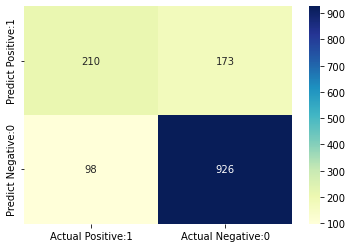

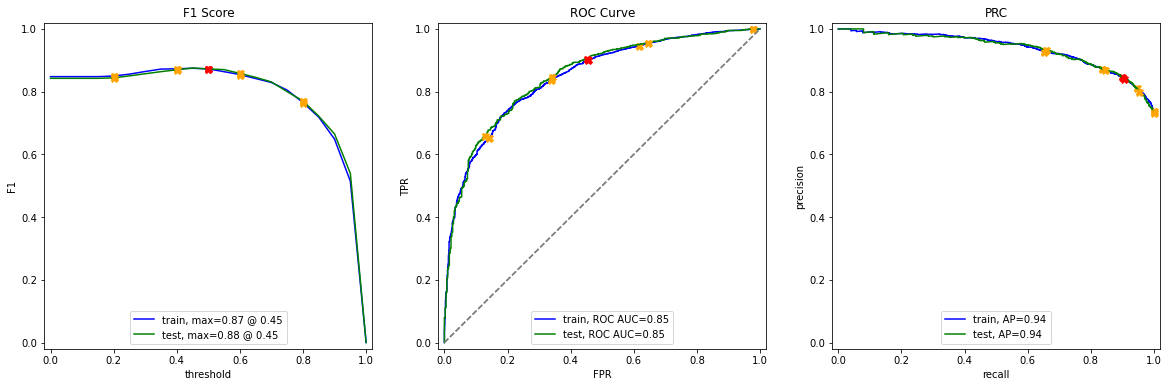

In [51]:
params = {'model__solver':['liblinear','saga'], 
              'model__penalty': [ 'l1', 'l2'],
              'model__C':[100, 10, 1.0, 0.1, 0.01]}
model   = LogisticRegression(random_state=12345)
name    ='Logistic Regression'
result_row = model_eval(model, params, name, features_train, target_train, features_test, target_test)
results = results.append(result_row)
# with pd.option_context('display.max_colwidth', 1000):
#     display(results)


#### Observations:
The Logistic Regression performs only a little bit better and almost the same as the baseline. ROC AUC score of 0.84 on the test set. We used the the following hyperparameters penalty='l1', random_state=12345,
                                    solver='saga'. The accuracy is 0.8 - better than the baseline. Since we haven't dealt with imbalance here the accuracy is not a good evaluator. Here also the negative values are predicted better that the positive ones. The precision is much better than the recall.

### XGBoost

Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.4,
                               max_delta_step=0, max_depth=4,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=12345, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=0))])
Top 12 important f

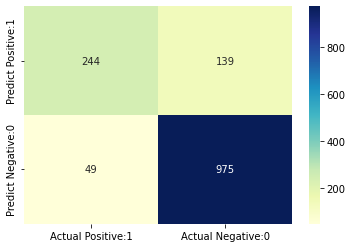

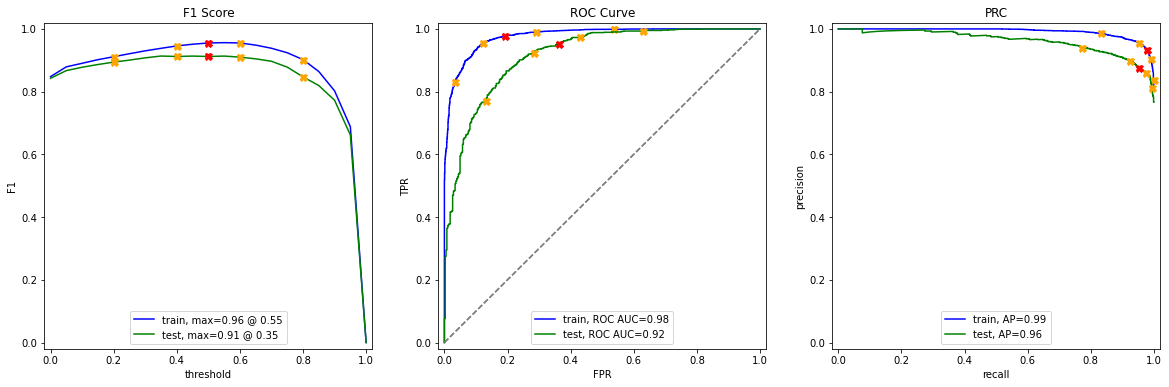

In [52]:
params = {'model__n_estimators' : [10, 30,60,100], 'model__learning_rate' : [0.4, 0.1, 0.01], 'model__max_depth' : [2,3,4,6,10]}
model   = XGBClassifier(random_state=12345, verbosity = 0)
name    ='XGBoost'
result_row = model_eval(model, params, name, features_train, target_train, features_test, target_test)

results = results.append(result_row)
# with pd.option_context('display.max_colwidth', 1000):
#     display(results)


#### Observations:
The XGBoost model performs much better than the previous 2 models. ROC AUC score of 0.91 on the test set. We used the following hyperparameters that the grid search found to be best:

learning_rate=0.4, max_depth=4, n_estimators=100,
The accuracy is 0.87 - better than the baseline. This model is not so sensitive to the imbalance. Here also the negative values are predicted better that the positive ones. The precision is very high. We van see that the train roc curve is much better (and higher) than the test. It implies that there might be overfitting in this model.

### Random Forest Classifier

Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=8,
                                        n_estimators=140, random_state=42))])
Top 12 important features
There is no feature_importances_ attribute for this model
          train  test
Accuracy   0.82  0.78
F1         0.87  0.84
APS        0.97  0.94
ROC AUC    0.91  0.86


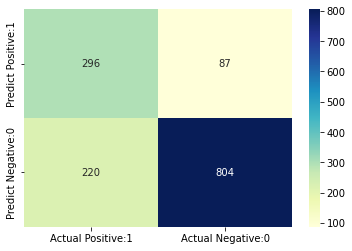

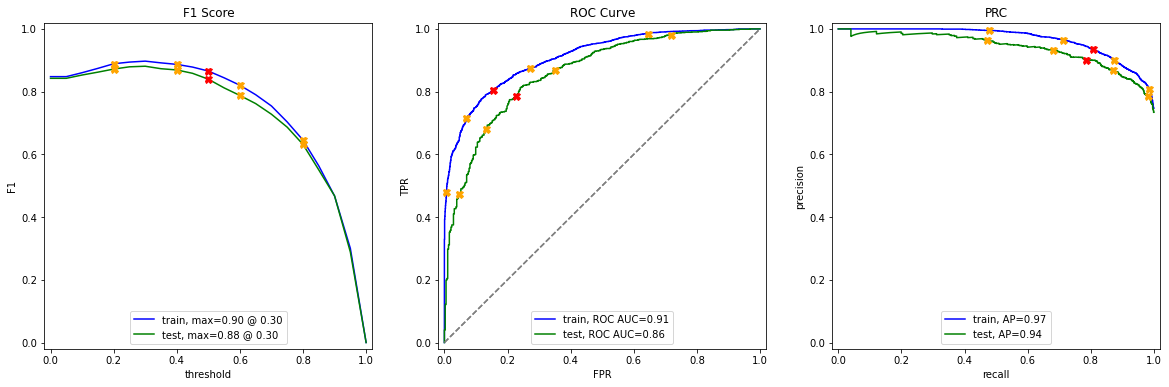

In [53]:
params = {'model__n_estimators': [130, 135, 140],
              'model__max_depth':  [7, 8, 9, 10, 11, 12]}
model   = RandomForestClassifier(random_state=42, class_weight="balanced")
name    ='Random Forest Classifier'
result_row = model_eval(model, params, name, features_train, target_train, features_test, target_test)

results = results.append(result_row)
# with pd.option_context('display.max_colwidth', 1000):
#     display(results)


#### Observations:
The Random Forest Classifier performs much worse the the xgboost but still a little better than the baseline. ROC AUC score of 0.86 on the test set. We used the the following hyperparameters:

class_weight='balanced', max_depth=9, n_estimators=135 

The accuracy is 0.8 - better than the baseline. Since we dealt with imbalance here we can look on the accuracy 0.79 which is not so good. Here also the negative values are predicted better that the positive ones. The precision is much better than the recall. 

### Gradient Boosting Classifier

Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.4, n_estimators=230,
                                            random_state=42))])
Top 12 important features
There is no feature_importances_ attribute for this model
          train  test
Accuracy   0.96  0.88
F1         0.97  0.92
APS        1.00  0.97
ROC AUC    0.99  0.93


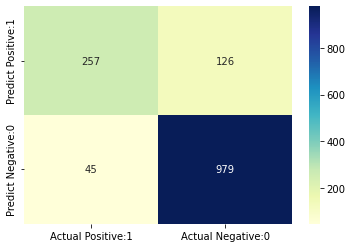

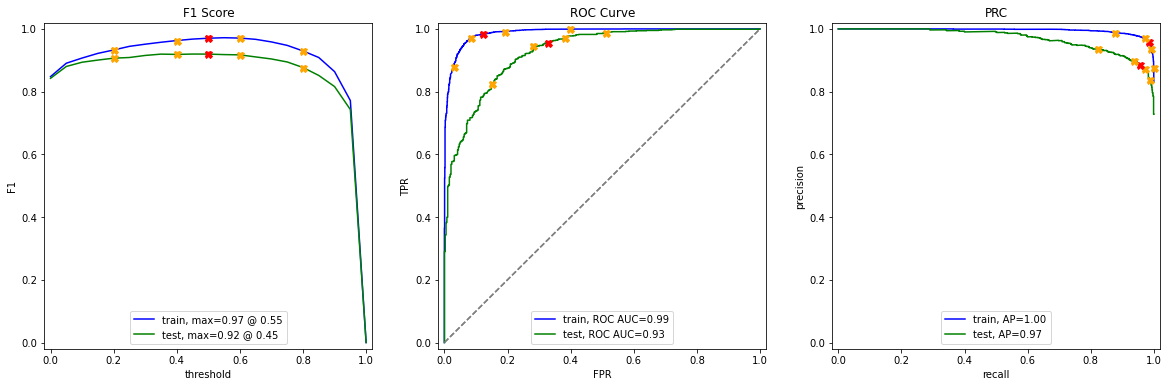

In [54]:
params = {'model__n_estimators': [175, 230], 'model__learning_rate': [0.2,0.35, 0.4],
                 'model__max_depth': [3, 4, 5, 7], 'model__random_state': [42], }
model   = GradientBoostingClassifier()
name    ='Gradient Boosting Classifier'
result_row = model_eval(model, params, name, features_train, target_train, features_test, target_test)

results = results.append(result_row)
# with pd.option_context('display.max_colwidth', 1000):
#     display(results)


#### Observations:
The Gradient Boosting Classifier is the best model so far. It has a ROC AUC score of 0.93 on the test set. We used the the following hyperparameters:
learning_rate=0.4, n_estimators=230

The accuracy is 0.88 - better than the baseline. Since we haven't dealt with imbalance here the accuracy is not a good evaluator. Here also the negative values are predicted better that the positive ones. The precision is much better than the recall. The F1 score drops to 0 when the threshold is 1. We van see that the train roc curve is much better (and higher) than the test. It implies that there might be overfitting in this model.
Let's try to select only the features with the highest importance to try and improve it further.

### Gradient Boosting Classifier with features selection

In [55]:
features_GB = ['Lifetime', 'TechSupport', 'TotalCharges', 'InternetService_Fiber optic', 'MonthlyCharges', 'PaymentMethod_Electronic check', 'OnlineSecurity', 'Type_Two year', 'Type_One year', 'PaperlessBilling', 'MultipleLines', 'OnlineBackup', 'DeviceProtection']#, 'gender_Male', 'SeniorCitizen' ]


Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.35,
                                            n_estimators=230,
                                            random_state=42))])
Top 12 important features
There is no feature_importances_ attribute for this model
          train  test
Accuracy   0.95  0.88
F1         0.97  0.92
APS        0.99  0.97
ROC AUC    0.99  0.93


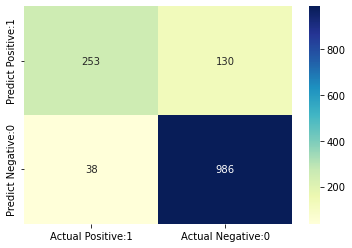

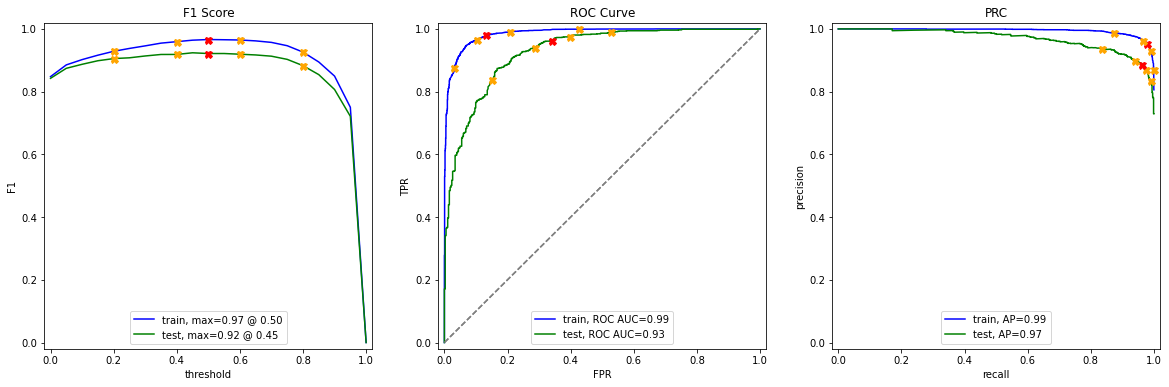

In [56]:
params = {'model__n_estimators': [175, 230], 'model__learning_rate': [0.2,0.35, 0.4],
                 'model__max_depth': [3, 4, 5, 7], 'model__random_state': [42], }
model   = GradientBoostingClassifier()
name    ='Gradient Boosting Classifier with features selection'
result_row = model_eval(model, params, name, features_train[features_GB], target_train, features_test[features_GB], target_test)

results = results.append(result_row)
# with pd.option_context('display.max_colwidth', 1000):
#     display(results)


#### Observations:
This time we used only the 10 most important features in the model to try and improve the overfitting and raise the score. Unfortunately the score of the test set dropped a little bit to 0.92 and the train set got higher- it means that the overfitting only grew.

### Gradient Boosting Classifier with label (KMeans)

Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.35,
                                            n_estimators=230,
                                            random_state=42))])
Top 12 important features
There is no feature_importances_ attribute for this model
          train  test
Accuracy   0.95  0.87
F1         0.97  0.92
APS        0.99  0.97
ROC AUC    0.99  0.92


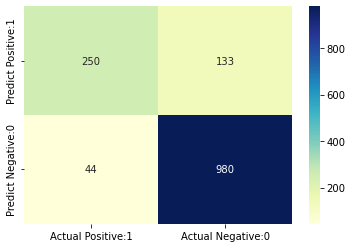

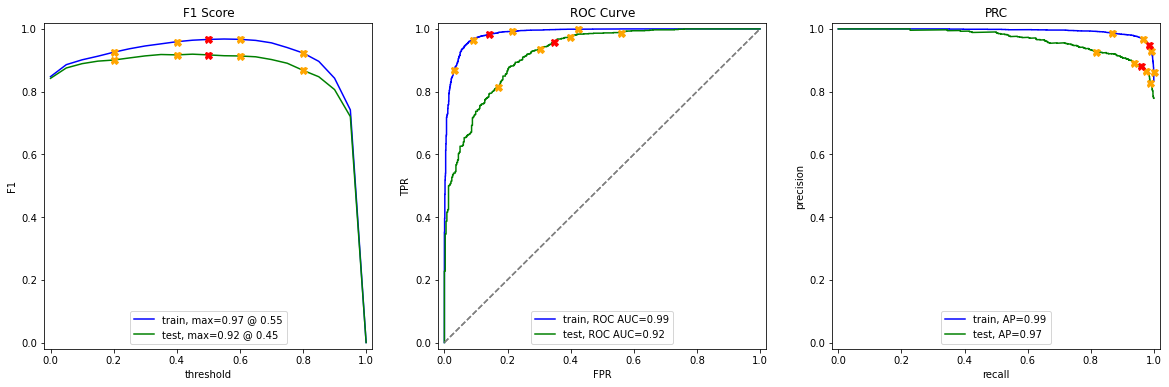

In [57]:
params = {'model__n_estimators': [175, 230], 'model__learning_rate': [0.35, 0.4],
                 'model__max_depth': [3, 4, 5, 7], 'model__random_state': [42], }
model   = GradientBoostingClassifier()
name    ='Gradient Boosting Classifier with label'
result_row = model_eval(model, params, name, features_train.join(df_clusters['label']), target_train, features_test.join(df_clusters['label']), target_test)

results = results.append(result_row)



#### Observatiopns:
In this model we tried to improve the Gradient Boosting by adding additional feature called `label` we created earlier using KMeans clustering to 2 clusters. As we can see the score is a little lower than before and the overfitting is bigger. This try was fertile as well.

## Scaling
For the neural network model we won't use gridsearchCV hence we will preproccess and scale it beforehand

In [58]:
scaler = MinMaxScaler()

features_train_scaled = features_train.copy()
features_test_scaled = features_test.copy()

scaler.fit_transform(features_train_scaled)
scaler.transform(features_test_scaled)

array([[0.        , 0.76      , 0.53911839, ..., 0.        , 1.        ,
        1.        ],
       [0.        , 0.57      , 0.07350565, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.07      , 0.03254096, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.82      , 0.76990538, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.39      , 0.11239326, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.01      , 0.03242557, ..., 0.        , 0.        ,
        0.        ]])

## Balancing the target data
Calculate the ratio of positive and negative labels in order to try several techniques to balance the data.

In [59]:
target_train.value_counts(normalize=True)

1    0.735822
0    0.264178
Name: loyal, dtype: float64

In [60]:
0.26594/0.73406

0.3622864615971446

### Upsampling

In [61]:
def upsample(features, target, repeat):
    '''
    Returns upsampeled balanced tuple of 2 data sets: features and target
    Keyword arguments:
        features - features data set
        target - loyal labels data set
        repeat - integer, the ratio to multiply the minority lable
    '''
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_ones] + [features_zeros] * repeat)
    target_upsampled = pd.concat([target_ones] + [target_zeros] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train_scaled, target_train, 3
)

### Downsampling

In [62]:
def downsample(features, target, fraction):
    '''
    Returns downsampeled balanced tuple of 2 data sets: features and target
    Keyword arguments:
        features - features data set
        target - loyal labels data set
        fraction - float, the ratio to multiply the majority lable
    '''
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_ones.sample(frac=fraction, random_state=12345)]
        + [features_zeros]
    )
    target_downsampled = pd.concat(
        [target_ones.sample(frac=fraction, random_state=12345)]
        + [target_zeros]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.36
)

### Fully connected network model
Tried tuning with different architectures using:
* different amount of layers (2-4)
* different amount of neurons in each layer (4-10)
* different activation function (sigmoid and ReLu)
* different optimizer (SGD and Adam)
* different learning rate (0.001-0.5)
* Different training time - (epochs 15-30)
* with scaled and unscaled data (MinMaxScaler)
* Unbalanced via upsampeled and downsampeled
Showing here only the best evaluation model structure.

In [132]:
import tensorflow as tf
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(22, activation="relu",input_dim=(features_train.shape[1])),
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(70, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01), 
                metrics=['AUC'])

# Fit the model for 20 epochs (5 less than before)
history = model_1.fit(features_train_scaled, target_train, epochs=20, batch_size = 32)


Epoch 1/20
176/176 [==============================] - 1s 1ms/step - loss: 7.6761 - auc: 0.7064
Epoch 2/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4751 - auc: 0.7894
Epoch 3/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4662 - auc: 0.7944
Epoch 4/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4894 - auc: 0.7763
Epoch 5/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4578 - auc: 0.8008
Epoch 6/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4554 - auc: 0.8041
Epoch 7/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4545 - auc: 0.8043
Epoch 8/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4553 - auc: 0.8047
Epoch 9/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4565 - auc: 0.8022
Epoch 10/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4542 - auc: 0.8040
Epoch 11/20
176/176 [============================

In [133]:
# Evaluate model on the test dataset
roc_auc = model_1.evaluate(features_test_scaled, target_test)

44/44 [==============================] - 0s 942us/step - loss: 0.4499 - auc: 0.8339


In [121]:
test_predict = model_1.predict(features_test_scaled)

In [84]:
f1 = f1_score(target_test, test_predict.round())
acc = accuracy_score(target_test, test_predict.round())

In [85]:
result_row = pd.DataFrame([[ 0.824,  
                          acc , f1, roc_auc[1], model_1]], 
                        columns=['Train AUC ROC',
                                 'Test Accuracy', 'Test F1','Test AUC ROC','Model Params'],
                       index=['Neural Network'])
results = results.append(result_row)

#### Observations:
We tried to implement a DNN model to predict binary calssification label. The results are not shiny. The ROC AUC score is 0.84 which is the same as our baseline model.

### Fully connected Neural Network with upsampling

In [68]:
import tensorflow as tf
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation="relu",input_dim=(features_train.shape[1])),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=[tf.keras.metrics.AUC()])

# Fit the model for 20 epochs (5 less than before)
history = model_2.fit(features_upsampled, target_upsampled, epochs=20)

Epoch 1/20
269/269 [==============================] - 1s 863us/step - loss: 2.7618 - auc: 0.6739
Epoch 2/20
269/269 [==============================] - 0s 931us/step - loss: 0.7763 - auc: 0.7523
Epoch 3/20
269/269 [==============================] - 0s 906us/step - loss: 0.7539 - auc: 0.7611
Epoch 4/20
269/269 [==============================] - 0s 999us/step - loss: 0.6591 - auc: 0.7732
Epoch 5/20
269/269 [==============================] - 0s 970us/step - loss: 0.6451 - auc: 0.7759
Epoch 6/20
269/269 [==============================] - 0s 919us/step - loss: 0.5524 - auc: 0.8082
Epoch 7/20
269/269 [==============================] - 0s 887us/step - loss: 0.5665 - auc: 0.8011
Epoch 8/20
269/269 [==============================] - 0s 972us/step - loss: 0.5401 - auc: 0.8163
Epoch 9/20
269/269 [==============================] - 0s 816us/step - loss: 0.5141 - auc: 0.8275
Epoch 10/20
269/269 [==============================] - 0s 816us/step - loss: 0.5124 - auc: 0.8274
Epoch 11/20
269/269 [========

In [69]:
# Evaluate model on the test dataset
model_2.evaluate(features_test_scaled, target_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.5817 - auc: 0.8364


[0.5817237496376038, 0.8363722562789917]

In [70]:
# Evaluate model on the test dataset
roc_auc = model_2.evaluate(features_test_scaled, target_test)

44/44 [==============================] - 0s 886us/step - loss: 0.5817 - auc: 0.8364


In [71]:
test_predict = model_2.predict(features_test_scaled)

In [72]:
f1 = f1_score(target_test, test_predict.round())
acc = accuracy_score(target_test, test_predict.round())

In [73]:
result_row = pd.DataFrame([[ 0.7831,  
                          acc , f1, roc_auc[1], model_2]], 
                        columns=['Train AUC ROC',
                                 'Test Accuracy', 'Test F1','Test AUC ROC','Model Params'],
                       index=['Neural Network with upsampling'])
results = results.append(result_row)

#### Observations:
We tried to improve our model using upsamle technique to deal with the data imbalance. Unfortunately it didn't help and even reduced it a bit. LEt's try a different approach - downsampling.

### Fully Connected Neural Network with Downsampling

In [158]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(22, activation="relu",input_dim=(features_train.shape[1])),
  tf.keras.layers.Dense(300, activation="relu"),
  tf.keras.layers.Dense(150, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=[tf.keras.metrics.AUC()])

# Fit the model for 20 epochs (5 less than before)
history = model_3.fit(features_downsampled, target_downsampled, epochs=20)

Epoch 1/20
93/93 [==============================] - 0s 1ms/step - loss: 5.2213 - auc_15: 0.6919
Epoch 2/20
93/93 [==============================] - 0s 1ms/step - loss: 0.5841 - auc_15: 0.7619
Epoch 3/20
93/93 [==============================] - 0s 1ms/step - loss: 0.5436 - auc_15: 0.7985
Epoch 4/20
93/93 [==============================] - 0s 1ms/step - loss: 0.5390 - auc_15: 0.8007
Epoch 5/20
93/93 [==============================] - 0s 2ms/step - loss: 0.5424 - auc_15: 0.7993
Epoch 6/20
93/93 [==============================] - 0s 1ms/step - loss: 0.5380 - auc_15: 0.8039
Epoch 7/20
93/93 [==============================] - 0s 1ms/step - loss: 0.5349 - auc_15: 0.8070
Epoch 8/20
93/93 [==============================] - 0s 1ms/step - loss: 0.5295 - auc_15: 0.8098
Epoch 9/20
93/93 [==============================] - 0s 1ms/step - loss: 0.5384 - auc_15: 0.8028
Epoch 10/20
93/93 [==============================] - 0s 1ms/step - loss: 0.5389 - auc_15: 0.8048
Epoch 11/20
93/93 [====================

In [159]:
# Evaluate model on the test dataset
model_3.evaluate(features_test, target_test)

44/44 [==============================] - 0s 890us/step - loss: 0.6362 - auc_15: 0.8234


[0.6361978650093079, 0.8233900666236877]

In [135]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(8, activation="relu",input_dim=(features_train.shape[1])),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=[tf.keras.metrics.AUC()])

# Fit the model for 20 epochs (5 less than before)
history = model_3.fit(features_downsampled, target_downsampled, epochs=20)

Epoch 1/20
93/93 [==============================] - 0s 705us/step - loss: 6.7638 - auc_3: 0.6000
Epoch 2/20
93/93 [==============================] - 0s 781us/step - loss: 1.5630 - auc_3: 0.7172
Epoch 3/20
93/93 [==============================] - 0s 717us/step - loss: 1.1647 - auc_3: 0.7284
Epoch 4/20
93/93 [==============================] - 0s 704us/step - loss: 0.7749 - auc_3: 0.7534
Epoch 5/20
93/93 [==============================] - 0s 750us/step - loss: 0.9647 - auc_3: 0.7185
Epoch 6/20
93/93 [==============================] - 0s 730us/step - loss: 0.8450 - auc_3: 0.7359
Epoch 7/20
93/93 [==============================] - 0s 722us/step - loss: 0.6902 - auc_3: 0.7744
Epoch 8/20
93/93 [==============================] - 0s 712us/step - loss: 0.9224 - auc_3: 0.7365
Epoch 9/20
93/93 [==============================] - 0s 815us/step - loss: 0.6951 - auc_3: 0.7712
Epoch 10/20
93/93 [==============================] - 0s 736us/step - loss: 0.6762 - auc_3: 0.7718
Epoch 11/20
93/93 [==========

In [76]:
# Evaluate model on the test dataset
roc_auc = model_3.evaluate(features_test_scaled, target_test)

44/44 [==============================] - 0s 749us/step - loss: 0.4773 - auc_1: 0.8444


In [77]:
test_predict = model_3.predict(features_test_scaled)

In [78]:
f1 = f1_score(target_test, test_predict.round())
acc = accuracy_score(target_test, test_predict.round())

In [79]:
result_row = pd.DataFrame([[ 0.7875,  
                          acc , f1, roc_auc[1], model_3]], 
                        columns=['Train AUC ROC',
                                 'Test Accuracy', 'Test F1','Test AUC ROC','Model Params'],
                       index=['Neural Network with downsampling'])
results = results.append(result_row)

#### Observations:
The downsampling performed even worse than the upsampling...

### Models comparison summary

In [80]:
with pd.option_context('display.max_colwidth', 1000):
    display(results.sort_values(by=['Test AUC ROC'],ascending=False))

,Train AUC ROC,Test Accuracy,Test F1,Test AUC ROC,Model Params
Gradient Boosting Classifier with features selection,0.9230,0.880597,0.921495,0.927743,"(StandardScaler(), ([DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n random_state=RandomState(MT19937) at 0x1B6FFD4D140)], [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n random_state=RandomState(MT19937) at 0x1B6FFD4D140)], [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n random_state=RandomState(MT19937) at 0x1B6FFD4D140)], [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n random_state=RandomState(MT19937) at 0x1B6FFD4D140)], [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n random_state=RandomState(MT19937) at 0x1B6FFD4D140)], [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n random_state=RandomState(MT19937) at 0x1B6FFD4D140)], [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n random_state=RandomState(MT19937) at 0x1B6FFD4D140)], [De..."
Gradient Boosting Classifier,0.9180,0.878465,0.919681,0.926899,"(StandardScaler(), ([DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n random_state=RandomState(MT19937) at 0x1B6FBDC3E40)], [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n random_state=RandomState(MT19937) at 0x1B6FBDC3E40)], [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n random_state=RandomState(MT19937) at 0x1B6FBDC3E40)], [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n random_state=RandomState(MT19937) at 0x1B6FBDC3E40)], [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n random_state=RandomState(MT19937) at 0x1B6FBDC3E40)], [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n random_state=RandomState(MT19937) at 0x1B6FBDC3E40)], [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n random_state=RandomState(MT19937) at 0x1B6FBDC3E40)], [De..."
Gradient Boosting Classifier with label,0.9180,0.874200,0.917174,0.921227,"(StandardScaler(), ([DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n random_state=RandomState(MT19937) at 0x1B6FFD4D340)], [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n random_state=RandomState(MT19937) at 0x1B6FFD4D340)], [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n random_state=RandomState(MT19937) at 0x1B6FFD4D340)], [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n random_state=RandomState(MT19937) at 0x1B6FFD4D340)], [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n random_state=RandomState(MT19937) at 0x1B6FFD4D340)], [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n random_state=RandomState(MT19937) at 0x1B6FFD4D340)], [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,\n random_state=RandomState(MT19937) at 0x1B6FFD4D340)], [De..."
XGBoost,0.9050,0.866382,0.912067,0.916580,"(StandardScaler(), XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n colsample_bynode=1, colsample_bytree=1, enable_categorical=False,\n gamma=0, gpu_id=-1, importance_type=None,\n interaction_constraints='', learning_rate=0.4, max_delta_step=0,\n max_depth=4, min_child_weight=1, missing=nan,\n monotone_constraints='()', n_estimators=100, n_jobs=8,\n num_parallel_tree=1, predictor='auto', random_state=12345,\n reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,\n tree_method='exact', validate_parameters=1, verbosity=0))"
Random Forest Classifier,0.8560,0.781805,0.839687,0.862236,"(StandardScaler(), (DecisionTreeClassifier(max_depth=8, max_features='auto',\n random_state=1608637542), DecisionTreeClassifier(max_depth=8, max_features='auto',\n random_state=1273642419), DecisionTreeClassifier(max_depth=8, max_features='auto',\n random_state=1935803228), DecisionTreeClassifier(max_depth=8, max_features='auto', random_state=787846414), DecisionTreeClassifier(max_depth=8, max_features='auto', random_state=996406378), DecisionTreeClassifier(max_depth=8, max_features='

### Final Conclusion:
The winner model is Gradient Boosting Classifier with no special preprocessing except for scaling.

The <b>key steps</b> to improve our models score were mainly the preprocessing part - <b>Creating the lifetime feature</b> and removing all dates features in order <b>to prevent data leakage.</b> We tried creating it with different scales and decided on the <b>daily basis</b> since it resulted in better performance.
we also added two more features - <b>has phone and has internet</b> in order not to loose any information when joining the tables together.

We Decide to use <b>ROC AUC</b> as the evaluation for our models since it's very suitable to classification problems and is <b>robust to imbalance</b> of the target classes compared to accuracy for example. 
When looking at the ROC curve we would like to choose a model that has high TPR (True Positive Rate) and low FPR (False Positive Rate). Since TPR is on the vertical axis and FPR is on the horizontal axis of the ROC curve we would prefer a model that each treshold appears as up and left as possible. It means that the area under the curve and above the linear line describing the random model should be as big as possible- This is the ROC AUC score. 

We kept our eyes on the <b>confusion matrix</b> as well to make sure we avoid as much as we can both <b>type I error and type II error.</b>

<b>The best ROC AUC score is 0.93 </b>which is pretty good. The test set has better results that the train set meaning that </b>there is no overfitting</b> here which is also good :)

The best hyperparameters are:
learning_rate=0.4, n_estimators=2304

Accuracy = 0.88
F1 = 0.92 :)

The most <b>important features</b> that helped this models are 
<b>Lifetime which had the biggest effect and then TechSupport and TotalCharges	</b>

<b>Some of the actions weren't so fruitful.</b>

For example- <b>adding clustering feature using the KMeans</b> model, using different techniques of scaling (MinMax normalization and standard scaling) and using the <b>downsample and upsample techniques</b> for treating imbalance. 
Also <b>reducing the amount of features based on they're importance</b>  didn't change the score much.
Unfortunately the <b>Neural networks</b>  didn't perform well here even after many tweakings to the models architecture and hyperparameters - even worse than the baseline. Although I do believe we can squeeze it more to get better results but since our time is short and there are great, simpler models at hand we decided to leave it as is.

In general it seems that the most efficient type of models were the gradient boosting based models.

These results are higher than the highest threshold suggested so  we can move on to the next step :)
